# Regression

Regression or value estimation  attempts to estimate or predict, for each individual,
the numerical value of some variable for that individual. While classification predicts _whether_ something will happen or not, regression predicts _how much_ something will happen. 

### Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [ ]:
cars = pd.read_csv('cars.csv')

In [3]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
cars.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
cars.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
cars.columns = cars.columns.str.lower().str.replace(' ', '_')

I also need to normalise the values and make values consistent. But first I need to find out the columns that have string values. I'm interested in objects.

In [7]:
cars.dtypes[cars.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [8]:
strings = list(cars.dtypes[cars.dtypes == 'object'].index)

In [9]:
# I will change the string columns (columns with string values) to lowercase and replace spaces with underscores.
for col in strings:
    cars[col] = cars[col].str.lower().str.replace(' ', '_', regex=True)

### Exploratory Data Analysis

In [10]:
# I want to learn more about the columns such as their unique values.
for col in cars.columns:
    print(col)
    print(cars[col].unique()[:5])
    print(cars[col].nunique())  # This shows how many unique values there are in the column
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

##### Distribution of price


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# To make sure that plots are displayed in the our notebook.

Text(0, 0.5, 'Count')

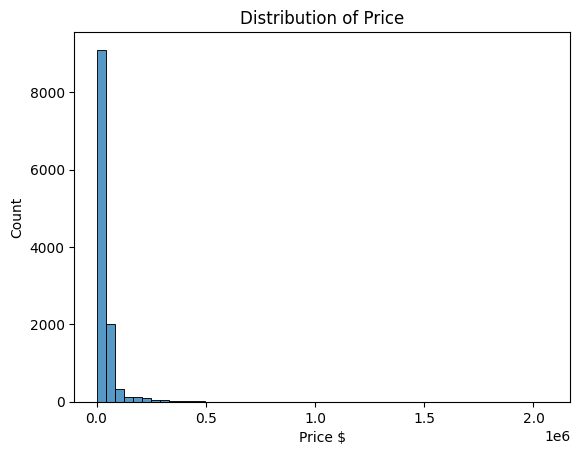

In [12]:
sns.histplot(cars.msrp, bins=50)
plt.title('Distribution of Price')  
plt.xlabel('Price $')
plt.ylabel('Count')

It's a long tail distribution. This kind of distribution is confusing for the model. Therefore, we need to get rid of this long tail and thus we apply logarithmic distribution. 

Text(0, 0.5, 'Count')

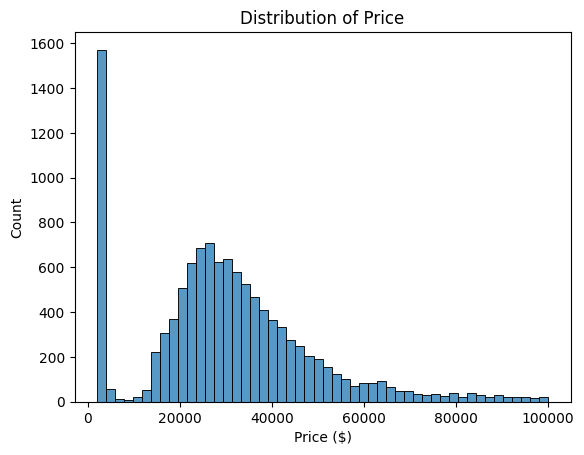

In [13]:
sns.histplot(cars.msrp[cars.msrp < 100000], bins=50)
plt.title('Distribution of Price')  
plt.xlabel('Price ($)')
plt.ylabel('Count')

In [14]:
np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000 + 1])

# I will apply the log transformation to the msrp column to reduce skewness.
# Because logarithm of 0 is undefined, I will add 1 to the msrp values before applying the log transformation.

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [15]:
# A shortcut for the above code is to use log1p function from numpy.
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [16]:
price_logs = np.log1p(cars.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

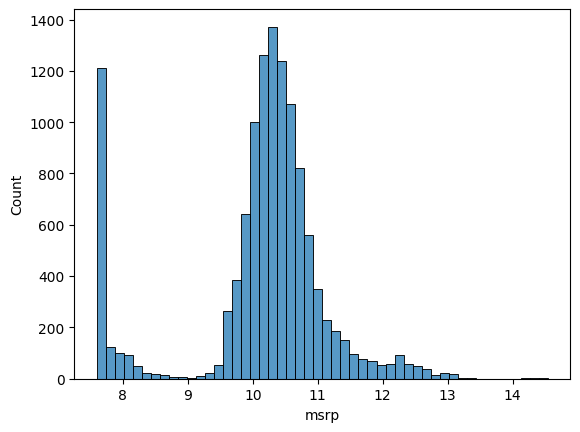

In [17]:
sns.histplot(price_logs, bins=50)

The distribution between 9 and 14 is a normal distribution and perfect for our model.

##### Missing Values

Let's see whether there are the missing values

In [18]:
cars.isnull().sum()


make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Setting the validation framework

Now, I need to split the data into training dateset, validation and testing datasets. 60% for training data, 20% for validation and 20% of data will be used for testing.

In [19]:
n_data = len(cars)
n_val = int(n_data * 0.2)  # 20% of the data for validation
n_test = int(n_data * 0.2)  # 20% of the data for testing
n_train = n_data - n_val - n_test  # Remaining data for training


In [20]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [21]:
cars.iloc[:10]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200
6,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,26,17,3916,44100
7,bmw,1_series,2012,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39300
8,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,36900
9,bmw,1_series,2013,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,27,18,3916,37200


In [22]:
cars_train = cars.iloc[:n_train]
cars_val = cars.iloc[n_train:n_train + n_val]
cars_test = cars.iloc[n_train + n_val:]

In [23]:
cars_val

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
7150,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,63645
7151,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,22,16,61,63195
7152,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,76650
7153,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,69135
7154,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,chevrolet,silverado_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,22,17,1385,37380
9528,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,extended_cab_pickup,23,16,1385,40100
9529,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42560
9530,chevrolet,silverado_1500,2015,regular_unleaded,355.0,8.0,automatic,rear_wheel_drive,4.0,NaN,large,crew_cab_pickup,23,16,1385,42860


The problem is that all BMW cars are in the validation dataset. So I need to shuffle the data to make sure that all cars are distributed in all datasets.

In [24]:
np.random.seed(42)  # To make it reproducible
idx = np.arange(n_data)
np.random.shuffle(idx)

In [25]:
cars_train = cars.iloc[idx[:n_train]]
cars_val = cars.iloc[idx[n_train:n_train + n_val]]
cars_test = cars.iloc[idx[n_train + n_val:]]

In [26]:
cars_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3995,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,29695
7474,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,30495
7300,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,37650
3148,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,16170
747,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10845,mazda,truck,2003,regular_unleaded,207.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,extended_cab_pickup,17,14,586,19975
4861,kia,forte,2015,regular_unleaded,201.0,4.0,manual,front_wheel_drive,4.0,"hatchback,performance",compact,4dr_hatchback,29,21,1720,20890
2334,dodge,caravan,2006,regular_unleaded,150.0,4.0,automatic,front_wheel_drive,4.0,flex_fuel,large,passenger_minivan,24,17,1851,18630
8651,acura,rsx,2005,regular_unleaded,160.0,4.0,automatic,front_wheel_drive,2.0,"hatchback,luxury,performance",compact,2dr_hatchback,31,22,204,21175


Now, the data is shuffled. Let's have a look at the length of datasets. 

In [27]:
len(cars_train), len(cars_val), len(cars_test)

(7150, 2382, 2382)

In [28]:
cars_train = cars_train.reset_index(drop=True)
cars_val = cars_val.reset_index(drop=True)
cars_test = cars_test.reset_index(drop=True)

In [29]:
cars_train.msrp

0       29695
1       30495
2       37650
3       16170
4        2000
        ...  
7145    19975
7146    20890
7147    18630
7148    21175
7149    29300
Name: msrp, Length: 7150, dtype: int64

In [30]:
y_train = np.log1p(cars_train.msrp.values)   # Let's make sure we apply log transformation to the target variable.
y_val = np.log1p(cars_val.msrp.values)
y_test = np.log1p(cars_test.msrp.values)


In [31]:
# Let's drop the msrp column from the feature set.
del cars_train['msrp']
del cars_val['msrp']
del cars_test['msrp']

In [32]:
len(y_train), len(y_val), len(y_test)

(7150, 2382, 2382)

## Training a linear regression model

Linear regression is a very simple approach for supervised learning and a useful tool for predicting a quantitative response. The least squares approach is most commonly used to fit this model. 

w : the bias term or intercept tells us the baseline, that is how much a car costs if we don't know anything about the car. 

The objective is to adjust a line for the data and make predictions on new values. The input of this model is the **feature matrix** `X` and a `y` **vector of predictions** is obtained, trying to be as close as possible to the **actual** `y` values. The linear regression formula is the sum of the bias term \( $w_0$ \), which refers to the predictions if there is no information, and each of the feature values times their corresponding weights as \( $x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$ \).

So the simple linear regression formula looks like:

$g(x_i) = w_0 + x_{i1} \cdot w_1 + x_{i2} \cdot w_2 + ... + x_{in} \cdot w_n$.

And that can be further simplified as:

$g(x_i) = w_0 + \displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$

_i_ refers to an individual obsercation or car in this example and _j_ refers to an individual feature. 

Here is a simple implementation of Linear Regression in python:

In [33]:
w0 = 7.1
def linear_regression(xi):
    
    n = len(xi)
    
    pred = w0
    w = [0.01, 0.04, 0.002]
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred

If we look at the $\displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$ part in the above equation, we know that this is nothing else but a vector-vector multiplication. Hence, we can rewrite the equation as $g(x_i) = w_0 + x_i^T \cdot w$

We need to assure that the result is shown on the untransformed scale by using the inverse function `exp()`. 

This is a simple linear regression model for one car:

In [34]:
# I will randomly choose a car.
cars_train.iloc[10]

make                            toyota
model                            yaris
year                              2015
engine_fuel_type      regular_unleaded
engine_hp                        106.0
engine_cylinders                   4.0
transmission_type               manual
driven_wheels        front_wheel_drive
number_of_doors                    2.0
market_category              hatchback
vehicle_size                   compact
vehicle_style            2dr_hatchback
highway_mpg                         37
city_mpg                            30
popularity                        2031
Name: 10, dtype: object

In [35]:
# I will only select 3 features such as engine horsepower, city_mpg and popularity.
xi = [106, 30, 2031]

In [36]:
# Bias term will be 0 and weights will be 1.
w0 = 0
w = [1, 1, 1]

In [37]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j] * xi[j]
    return pred
    

In [38]:
linear_regression(xi)

2167

In [39]:
np.exp(2167) - 1

/tmp/ipykernel_1742/3349231982.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(2167) - 1


np.float64(inf)

The above example was just for one vector, i.e one specific car.

The formula of linear regression can be synthesized with the dot product between features and weights. The feature vector includes the *bias* term with an *x* value of one, such as $w_{0}^{x_{i0}},\ where\ x_{i0} = 1\ for\ w_0$.

When all the records are included, the linear regression can be calculated with the dot product between ***feature matrix*** and ***vector of weights***, obtaining the `y` vector of predictions. 

In [40]:
def dot(xi, w):
    n = len(xi)

    res = 0.0
    for j in range(n):
        res = res + w[j] * xi[j]
    return res

In [41]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [42]:
w_new = [w0] + w
def linear_regression(xi):
    xi = [1] + xi  # Adding the bias term as the first element
    return dot(xi, w_new)

In [43]:
linear_regression(xi)

2167.0

Linear reegression for all observations:

In [44]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)

In [45]:
def linear_regression(X):
    return X.dot(w_new)

In [46]:
linear_regression(X)

array([1557, 2188,  550])

Now the question is that how we come up with the value of _w_?

Obtaining predictions as close as possible to $y$ target values requires the calculation of weights from the general
LR equation. The feature matrix does not 
have an inverse because it is not square, so it is required to obtain an approximate solution, which can be
obtained using the **Gram matrix** 
(multiplication of feature matrix ($X$) and its transpose ($X^T$)). The vector of weights or coefficients $w$ obtained with this
formula is the closest possible solution to the LR system.

Normal Equation:

$w$ = $(X^TX)^{-1}X^Ty$

Where:

$X^TX$ is the Gram Matrix

_T_ means transpose.

In [47]:
def train_linear_regression(X, y):
    pass

In [48]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [49]:
ones = np.ones(X.shape[0])  # Create a column of ones for the bias term
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
X = np.column_stack([ones, X])

In [51]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [52]:
XTX = X.T.dot(X)  # This function computes the Gram matrix. X is a matrix of features and T is the transpose of X. The dot product computes the matrix multiplication.
XTX_inv = np.linalg.inv(XTX) # This computes the inverse of the Gram matrix.
w_full = XTX_inv.dot(X.T).dot(y) # This computes the weights for the linear regression model using the normal equation.

In [53]:
w0 = w_full[0]  # This is the intercept term.
w = w_full[1:]  # This is the coefficient for the rest of features.
w0, w

(np.float64(25844.754055766833),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

 -16 means that as car gets 1 year older, the price decreases by 16. 

In [54]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # Create a column of ones for the intercept term.
    X = np.column_stack([ones, X])  # Stack the column of ones with the feature matrix.

    XTX = X.T.dot(X)  # Compute the Gram matrix.
    XTX_inv = np.linalg.inv(XTX)  # Compute the inverse of the Gram matrix.
    w_full = XTX_inv.dot(X.T).dot(y)  # Compute the weights using the normal equation.
    return w_full[0], w_full[1:]  # Return the intercept and the coefficients.

In [55]:
#train_linear_regression(X, y)

### Car price model

* In this lesson we build a baseline model and apply the `cars_train` dataset to derive weights for the bias (w0) and the features (w). For this, we use the `train_linear_regression(X, y)` function from the previous lesson.
* Linear regression only applies to numerical features. Therefore, only the numerical features from `cars_train` are used for the feature matrix. 
* We notice some of the features in `cars_train` are `nan`. We set them to `0` for the sake of simplicity, so the model is solvable, but it will be appropriate if a non-zeo value is used as the filler (e.g. mean value of the feature).
* Once the weights are calculated, then we apply them on  $$\\\\ \large g(X) = w_0 + X \cdot w$$ to derive the predicted y vector.
* Then we plot both predicted y and the actual y on the same histogram for a visual comparison.


In [56]:
cars_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [57]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg','popularity']
X_train = cars_train[base].values  # Extract the feature values as a NumPy array

# I will check whether we have missing values. I will fill them with 0s.
X_train = cars_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

# Now, I can use weights to make predictions.
y_pred = w0 + X_train.dot(w)
y_pred

array([10.10247365,  9.87092892, 10.05752179, ...,  9.33424064,
        9.64056275, 10.5470884 ], shape=(7150,))

<Axes: ylabel='Count'>

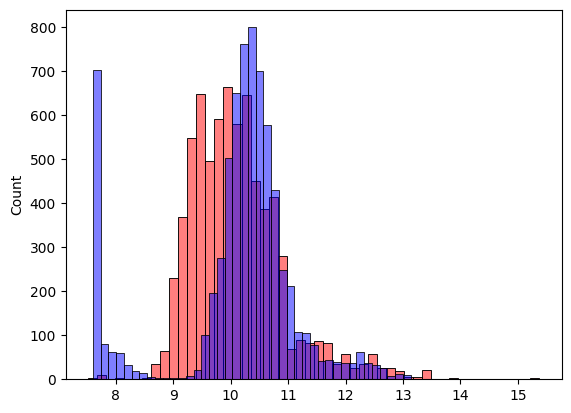

In [58]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins=50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

It seems that our model is not the ideal one. To determine whether our model is good or not we need to evaluate the model by using Root Mean Squared Error.

## Root Mean Squared Error (RMSE)

* In the previous lesson we found out our predictions were a bit off from the actual target values in the training dataset. We need a way to quantify how good or bad the model is. This is where RMSE can be of help.
* Root Mean Squared Error (RMSE) is a way to evaluate regression models. It measures the error associated with the model being evaluated. This numerical figure can then be used to compare models, enabling us to choose the one that gives the best predictions.

$$RMSE = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} {(g(x_i) - y_i)^2}}$$

- $g(x_i)$ is the prediction
- $y_i$ is the actual value
- $m$ is the number of observations in the dataset (i.e. cars)

In [59]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [60]:
rmse(y_train, y_pred)

np.float64(0.7570200472453603)

## Computing RMSE on validation data

In [61]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg','popularity']
X_train = cars_train[base].values  # Extract the feature values as a NumPy array

# I will check whether we have missing values. I will fill them with 0s.
X_train = cars_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

# Now, I can use weights to make predictions.
y_pred = w0 + X_train.dot(w)
y_pred

array([10.10247365,  9.87092892, 10.05752179, ...,  9.33424064,
        9.64056275, 10.5470884 ], shape=(7150,))

In [62]:
def prepare_X(cars):
    cars_num = cars[base]
    cars_num = cars_num.fillna(0) 
    X = cars_num.values
    return X

In [63]:
X_train = prepare_X(cars_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(cars_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.739818428511342)

## Feature Engineering

Feature engineering is the process of creating new features. The feature age of the car was included in the dataset, obtained with the subtraction of the maximum year of cars and each of the years of cars. This new feature improved the model performance, measured with the RMSE and comparing the distributions of y target variable and predictions.

In [64]:
# One of the features in our data is the age of the car.
cars_train.year.max()

np.int64(2017)

In [65]:
def prepare_X(cars):
    cars = cars.copy()  # Create a copy to avoid modifying the original DataFrame
    cars['age'] = 2017 - cars.year
    features = base + ['age']
    cars_num = cars[features]
    cars_num = cars_num.fillna(0) 
    X = cars_num.values
    return X

In [66]:
X_train = prepare_X(cars_train)

In [67]:
X_train
# Now, I have 6 features including the age of the car.

array([[2.750e+02, 6.000e+00, 1.800e+01, 1.300e+01, 5.490e+02, 1.200e+01],
       [1.700e+02, 4.000e+00, 3.800e+01, 2.500e+01, 8.730e+02, 1.000e+00],
       [2.480e+02, 6.000e+00, 2.800e+01, 1.900e+01, 2.202e+03, 1.000e+00],
       ...,
       [1.500e+02, 4.000e+00, 2.400e+01, 1.700e+01, 1.851e+03, 1.100e+01],
       [1.600e+02, 4.000e+00, 3.100e+01, 2.200e+01, 2.040e+02, 1.200e+01],
       [2.740e+02, 4.000e+00, 2.700e+01, 1.700e+01, 1.439e+03, 3.000e+00]],
      shape=(7150, 6))

In [68]:
X_train = prepare_X(cars_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(cars_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5133241025826346)

<Axes: ylabel='Count'>

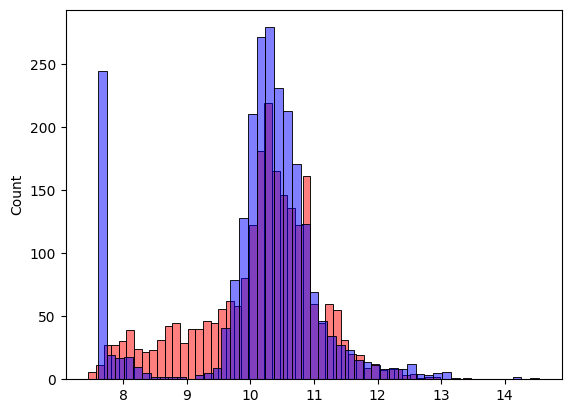

In [69]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins=50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)

## Categorical Variables

Categorical variables are typically represented as strings, and pandas identifies them as object types. However, some variables that appear to be numerical may actually be categorical (e.g., the number of doors a car has). All these categorical variables need to be converted to a numerical form because ML models can interpret only numerical features. It is possible to incorporate certain categories from a feature, not necessarily all of them. This transformation from categorical to numerical variables is known as One-Hot encoding.

In [70]:
cars_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [71]:
cars_train.number_of_doors.unique()

array([ 4.,  2.,  3., nan])

Number of doors is actually a categorical variable not a numerical: cars that have 2 doors and cars that have 4 doors.

In [72]:
for v in [2, 3, 4]:
    cars_train['num_doors_%s' % v] = (cars_train.number_of_doors == v).astype(int)

In [73]:
'num_doors_%s' % 4

'num_doors_4'

In [74]:
cars_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,0,0,1
1,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,0,0,1
2,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,0,0,1
3,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,0,0,1
4,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,truck,2003,regular_unleaded,207.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,extended_cab_pickup,17,14,586,1,0,0
7146,kia,forte,2015,regular_unleaded,201.0,4.0,manual,front_wheel_drive,4.0,"hatchback,performance",compact,4dr_hatchback,29,21,1720,0,0,1
7147,dodge,caravan,2006,regular_unleaded,150.0,4.0,automatic,front_wheel_drive,4.0,flex_fuel,large,passenger_minivan,24,17,1851,0,0,1
7148,acura,rsx,2005,regular_unleaded,160.0,4.0,automatic,front_wheel_drive,2.0,"hatchback,luxury,performance",compact,2dr_hatchback,31,22,204,1,0,0


In [75]:
def prepare_X(cars):
    cars = cars.copy()  # Create a copy to avoid modifying the original DataFrame
    features = base.copy()  # I don't want to modify the base list

    cars['age'] = 2017 - cars.year
    features.append('age')

    for v in [2, 3, 4]:
        cars['num_doors_%s' % v] = (cars.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)
    
    cars_num = cars[features]
    cars_num = cars_num.fillna(0) 
    X = cars_num.values
    return X

In [76]:
prepare_X(cars_train)

array([[275.,   6.,  18., ...,   0.,   0.,   1.],
       [170.,   4.,  38., ...,   0.,   0.,   1.],
       [248.,   6.,  28., ...,   0.,   0.,   1.],
       ...,
       [150.,   4.,  24., ...,   0.,   0.,   1.],
       [160.,   4.,  31., ...,   1.,   0.,   0.],
       [274.,   4.,  27., ...,   1.,   0.,   0.]], shape=(7150, 9))

In [77]:
X_train = prepare_X(cars_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(cars_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.5108230515525419)

In [78]:
cars.make.unique()

array(['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan',
       'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'toyota',
       'mclaren', 'maybach', 'pontiac', 'porsche', 'saab', 'gmc',
       'hyundai', 'plymouth', 'honda', 'oldsmobile', 'suzuki', 'ford',
       'cadillac', 'kia', 'bentley', 'chevrolet', 'dodge', 'lamborghini',
       'lincoln', 'subaru', 'volkswagen', 'spyker', 'buick', 'acura',
       'rolls-royce', 'maserati', 'lexus', 'aston_martin', 'land_rover',
       'lotus', 'infiniti', 'scion', 'genesis', 'hummer', 'tesla',
       'bugatti'], dtype=object)

In [79]:
makes = list(cars.make.value_counts().head(5).index)

In [80]:
def prepare_X(cars):
    cars = cars.copy()  # Create a copy to avoid modifying the original DataFrame
    features = base.copy()  # I don't want to modify the base list

    cars['age'] = 2017 - cars.year
    features.append('age')

    for v in [2, 3, 4]:
        cars['num_doors_%s' % v] = (cars.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)

    for v in makes:
        cars['make_%s' % v] = (cars.make == v).astype(int)
        features.append('make_%s' % v)
   
    
    cars_num = cars[features]
    cars_num = cars_num.fillna(0) 
    X = cars_num.values
    return X

In [81]:
X_train = prepare_X(cars_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(cars_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.501514955025747)

In [82]:
cars_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [83]:
categorical_variables = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [84]:
categories = {}

for c in categorical_variables:
    categories[c] = list(cars[c].value_counts().head().index)

In [85]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [86]:
def prepare_X(cars):
    cars = cars.copy()  # Create a copy to avoid modifying the original DataFrame
    features = base.copy()  # I don't want to modify the base list

    cars['age'] = 2017 - cars.year
    features.append('age')

    for v in [2, 3, 4]:
        cars['num_doors_%s' % v] = (cars.number_of_doors == v).astype(int)
        features.append('num_doors_%s' % v)

    for c, values in categories.items():
        for v in values:
            cars['%s_%s' % (c, v)] = (cars[c] == v).astype(int)
            features.append('%s_%s' % (c, v))
    
    cars_num = cars[features]
    cars_num = cars_num.fillna(0) 
    X = cars_num.values
    return X

In [87]:
X_train = prepare_X(cars_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(cars_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(999.7441202108189)

In [88]:
w0

np.float64(8.075081661146242e+16)

Something went wrong. The RMSE is very high.

## Regularization

If the feature matrix has duplicate columns (or columns that can be expressed as a linear combination of other columns), it will not have an inverse matrix. But, sometimes this error could be passed if certain values are slightly different between duplicated columns.

So, if we apply the normal equation with this feature matrix, the values associated with duplicated columns are very large, which decreases the model performance. To solve this issue, one alternative is adding a small number to the diagonal of the feature matrix, which corresponds to regularization.

This technique works because the addition of small values to the diagonal makes it less likely to have duplicated columns. The regularization value is a hyperparameter of the model. After applying regularization the model performance improved.

In [89]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],
]
X = np.array(X)
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

There are duplicate columns in the above array.

In [90]:
np.linalg.inv(XTX)

LinAlgError: Singular matrix

I didn't see the same error in our data that there is a singular matrix. This might be because there isn't any noise in the data. So I add a very tiny number to one of the values here.

In [91]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]
X = np.array(X)
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

It tries to find the inverse even though the inverse doesn't exist. 

In [92]:
y = [1, 2, 3, 1, 2, 3]

In [93]:
XTX_inv = np.linalg.inv(XTX)

In [94]:
XTX_inv.dot(X.T).dot(y)

array([ 3.25115862e-01, -4.41093100e+06,  4.41093113e+06])

I didn't get the singular matrix but the second and third numbers are really large. To solve this problem, I will add a small number to the diogonal of feature matrix.

In [95]:
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1],
    [2, 1, 1.0001]
]
XTX = np.array(XTX)

The larger the number I add to the diagonal, the more I have these weights under control.  

In [96]:
np.linalg.inv(XTX)

array([[-3.33366669e-01,  3.33350001e-01,  3.33350001e-01],
       [ 3.33350001e-01,  4.99991665e+03, -5.00008335e+03],
       [ 3.33350001e-01, -5.00008335e+03,  4.99991665e+03]])

In [ ]:
XTX = XTX + 0.01 * np.eye(3)
np.linalg.inv(XTX)
# This is a regularization technique that I use to control the weights.

array([[ -0.33672284,   0.33503094,   0.33503094],
       [  0.33503094,  49.42034681, -49.58955418],
       [  0.33503094, -49.58955418,  49.42034681]])

In [98]:
def train_linear_regression_reg(X, y, r = 0.001): # r is the regularization parameter.
    ones = np.ones(X.shape[0]) # Create a column of ones for the intercept term.
    X = np.column_stack([ones, X])  # Stack the column of ones with the feature matrix.

    XTX = X.T.dot(X)  # Compute the Gram matrix.
    XTX = XTX + r * np.eye(XTX.shape[0])  # Add regularization term to the Gram matrix.
    
    XTX_inv = np.linalg.inv(XTX)  # Compute the inverse of the Gram matrix.
    w_full = XTX_inv.dot(X.T).dot(y)  # Compute the weights using the normal equation.
    return w_full[0], w_full[1:]  # Return the intercept and the coefficients.

In [99]:
X_train = prepare_X(cars_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.001)

X_val = prepare_X(cars_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.4561219781799699)

By adding a number to the diogonal we can control weights and regularise our model. The r is a parameter. Now, I need to find the best value for the r.

## Tuning the model

Tuning the model involves finding the best regularization hyperparameter value, using the validation partition of the dataset. The model will then be trained with this regularization value.

In [101]:
# What is the best value for regularization?

for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(cars_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)
    X_val = prepare_X(cars_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 8.075081661146242e+16 999.7441202108189
1e-05 6.991644507230641 0.4561226401775628
0.0001 6.360620223131105 0.4561225793084647
0.001 6.360320241885991 0.4561219781799699
0.01 6.347219527630288 0.4561164567652546
0.1 6.227881384114469 0.4561014918534623
1 5.5715110069449585 0.4570860965883619
10 4.281476010615224 0.46872299835943415


It seems that 0.0001 and 0.001 are good values for the regularisation parameter. I will use 0.001. 

In [102]:
r = 0.001
X_train = prepare_X(cars_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = r)

X_val = prepare_X(cars_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.4561219781799699)

I tested on validation data. Now, let's check on the test data.

## Using the model

After finding the best model and its parameters, it will be trained with both training and validation datasets and the final RMSE will be calculated on the test dataset.

Finally, the final model will be used to predict the price of new cars.

In [104]:
# I will combine the training and validation sets.

cars_full_train = pd.concat([cars_train, cars_val], ignore_index=True)
cars_full_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,gmc,envoy_xl,2005,regular_unleaded,275.0,6.0,automatic,rear_wheel_drive,4.0,NaN,large,4dr_suv,18,13,549,0.0,0.0,1.0
1,volkswagen,passat,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,4.0,NaN,midsize,sedan,38,25,873,0.0,0.0,1.0
2,honda,odyssey,2016,regular_unleaded,248.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,28,19,2202,0.0,0.0,1.0
3,chevrolet,cruze,2015,regular_unleaded,138.0,4.0,manual,front_wheel_drive,4.0,NaN,midsize,sedan,36,25,1385,0.0,0.0,1.0
4,volvo,740,1991,regular_unleaded,162.0,4.0,automatic,rear_wheel_drive,4.0,"luxury,performance",midsize,sedan,20,17,870,0.0,0.0,1.0


In [ ]:
X_full_train = prepare_X(cars_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)
w

array([[275.,   6.,  18., ...,   0.,   0.,   0.],
       [170.,   4.,  38., ...,   0.,   0.,   0.],
       [248.,   6.,  28., ...,   0.,   0.,   0.],
       ...,
       [310.,   8.,  19., ...,   0.,   0.,   0.],
       [190.,   6.,  16., ...,   0.,   0.,   0.],
       [302.,   4.,  30., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [110]:
# I will prepare the test set.
X_test = prepare_X(cars_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.44976337577289816)

It seems that the model has the same RMSE as the model for the validation data which means that the model can generalise very well.

Now, I will use the model to predict the price of a car:

In [112]:
car_84 = cars_test.iloc[84].to_dict()
car_84

{'make': 'cadillac',
 'model': 'brougham',
 'year': 1991,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 170.0,
 'engine_cylinders': 8.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'luxury',
 'vehicle_size': 'large',
 'vehicle_style': 'sedan',
 'highway_mpg': 23,
 'city_mpg': 15,
 'popularity': 1624}

In [116]:
df_car_84 = pd.DataFrame([car_84])
X_car_84 = prepare_X(df_car_84)
y_pred_84 = w0 + X_car_84.dot(w)
y_pred_84 = y_pred_84[0]  # Extract the single prediction value
y_pred_84

np.float64(8.187052733038819)

In [117]:
np.expm1(y_pred_84)  # Convert the log price back to the original scale

np.float64(3593.1138083108594)

The actual value is 2000 while the predicted value is 3593. It seems that more features should be included in the model for a closer prediction. 